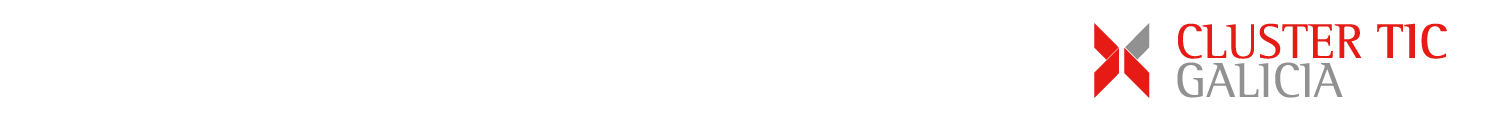
<a name = "inicio"></a>

<div style="font-size: 50px;text-align: center;height:70px;line-height: 60px;padding:10px;margin:10px 0 0 0;">Introducción a NumPy</div>

1. [Presentación](#Presentación)
1. [El array multidimensional ndarray](#El-array-multidimensional-ndarray)
1. [Creación de arrays](#Creación-de-arrays)
1. [Tipos de datos](#Tipos-de-datos)
1. [Indexado y selección](#Indexado-y-selección)
1. [Redimensionamiento de arrays](#Redimensionamiento-de-arrays)

# Presentación

La librería NumPy es una librería fundamental en el análisis de datos y es la base sobre la que se fundamentan otras muchas. Provee la clase **ndarray** (*n-dimensional array*) que nos permite crear estructuras de datos multidimensionales, así como herramientas para su gestión, funciones matemáticas de diversa naturaleza en torno al array, funciones de alto nivel de álgebra lineal y herramientas para la generación de números pseudo-aleatorios.

La documentación oficial está disponible en el sitio web de NumPy: <a href = "https://numpy.org">https://numpy.org</a>

La librería NumPy suele importarse con el alias **np**.

In [1]:
import numpy as np

Su nombre proviene de **Numeric Python**. De hecho, su primera versión (en 1995) se llamaba **Numeric**, y no se cambió por **NumPy** hasta 2006.

Podemos comprobar la versión que tenemos instalada con la siguiente instrucción:

In [2]:
print(np.__version__)

1.26.4


Aun cuando NumPy no ofrece demasiada funcionalidad de alto nivel, entender cómo funcionan los arrays resulta clave para poder usar otras librerías como Pandas de forma más efectiva.

<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

# El array multidimensional ndarray

NumPy da solución, entre otras cosas, a la necesidad de operar con colecciones de valores de una forma eficiente. Así, por ejemplo, si partimos de las siguientes listas:

In [3]:
m = [1, 2, 3]
n = [3, 4, 5]

no hay forma de sumar los elementos de m y n por parejas (para devolver algo como [4, 6, 8]) salvo que recurramos a bucles externos, lo que, para conjuntos de datos de cierto tamaño, resulta extremadamente ineficiente. El "*operador suma*" nos devuelve la concatenación de las listas, que no es lo que deseamos:

In [4]:
m + n

[1, 2, 3, 3, 4, 5]

Tampoco podemos aplicar una función a cada valor de una lista salvo, nuevamente, recurriendo a bucles.

NumPy ofrece una alternativa a las listas de datos de Python: el **array multidimensional** (o simplemente **array**). Si éste es de una dimensión, recuerda a la lista de Python pero permitiendo realizar operaciones entre ellos, u operaciones entre escalares y ellos, o ejecutar ciertas operaciones sobre todos los elementos del array de forma simultánea:

In [5]:
a = np.array([1, 2, 3])
a

array([1, 2, 3])

En el ejemplo anterior simplemente hemos creado un array unidimensional conteniendo los valores 1, 2, 3. Podemos aplicarle una función que eleva cada valor del array al cuadrado:

In [6]:
np.square(a)

array([1, 4, 9])

(no estamos asignando el resultado de la función a ninguna variable, simplemente estamos mostrándola en pantalla)

O, si tenemos otro array o un escalar, podemos realizar operaciones entre ellos:

In [7]:
b = np.array([5, 6, 7])

In [8]:
a + b

array([ 6,  8, 10])

In [9]:
a - 2

array([-1,  0,  1])

Los arrays son contenedores multidimensionales para datos homogéneos. Es decir, todos los datos contenidos en un array deberán ser del mismo tipo (todos números enteros, o todos cadenas de texto, etc., pero todos del mismo tipo). Todos los arrays tienen un número de dimensiones, un tamaño que define el número de elementos en cada dimensión del array, y un tipo que describe el tipo de los datos contenidos en el array.

<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

# Creación de arrays

NumPy ofrece diversas formas de crear un array. La más sencilla es la función *numpy.array*, pero no es la única ni la más adecuada siempre. Comencemos viendo esta función:

### La función array

https://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html

La función **numpy.array** es la forma más simple de crear un array a partir de otra estructura. En este ejemplo, partimos de una lista n y creamos un array:

In [10]:
n = [1, 2, 3]
a = np.array(n)

El atributo **ndim** devuelve el número de dimensiones del array

In [11]:
a.ndim

1

El atributo **shape** devuelve una tupla con tantas cifras como dimensiones tiene el array, y cada cifra indica el número de elementos en la correspondiente dimensión (este atributo también puede ser usado para fijar el tamaño del array).

In [12]:
a.shape

(3,)

En este caso vemos que el array *a* recién creado tiene una única dimensión y 3 elementos en dicha dimensión.

El atributo **dtype** devuelve el tipo del array. Por motivos de rendimiento -como ya se ha adelantado-, un array solo puede contener elementos de un único tipo.

In [13]:
a.dtype

dtype('int32')

El tipo de los valores contenidos en nuestro array es *int32* (enteros representados con 32 bits).

Si alguno de los datos de la lista n utilizada hubiese sido un número real, por ejemplo, la función *np.array* habría modificado el tipo del array creado para adoptar uno que englobase a todos los tipos involucrados en la lista -en este caso el tipo *float* correspondiente a los números reales-:

In [14]:
n = [1.0, 2, 3]
a = np.array(n)

In [15]:
print(a.dtype)

float64


Este proceso de modificación del tipo de forma que englobe a todos los tipos de la estructura a partir de la cual se crea el array es lo que se conoce como **coerción de tipo**.

Podemos encontrar información sobre los tipos básicos en el siguiente enlace:

https://docs.scipy.org/doc/numpy/user/basics.types.html

En un caso extremo, la función adoptaría como tipo común el string:

In [16]:
n = [1.0, "a", 3]
a = np.array(n)
a

array(['1.0', 'a', '3'], dtype='<U32')

In [17]:
a.dtype

dtype('<U32')

El valor <U32 nos indica que se trata de un arrays de strings Unicode de 32 caracteres como máximo codificado como "little-endian" (con el bit menos significativo situado a la izquierda), lo que sabemos por el símbolo "<".

Esta función permite fijar el tipo del array con el parámetro **dtype**:

In [18]:
a = np.array([1, 2, 3], dtype = "float")
a

array([1., 2., 3.])

In [19]:
a.dtype

dtype('float64')

Si especificamos un tipo genérico como *float* (sin especificar el número de bytes), se asignará el tamaño por defecto para dicho tipo (64, como vemos en la celda anterior). Si quisiéramos especificar el número de bits, podríamos hacerlo también:

In [20]:
a = np.array([1, 2, 3], dtype = "float16")
a

array([1., 2., 3.], dtype=float16)

In [21]:
a.dtype

dtype('float16')

### Ejemplos de arrays

Creemos algunos arrays básicos de una, dos y tres dimensiones:

###### Arrays de una dimensión

Ya hemos creado un array de una dimensión a partir de una lista:

In [22]:
a = np.array([1, 2, 3])
a

array([1, 2, 3])

In [23]:
a.shape

(3,)

Si creamos el array -como en este caso- a partir de una lista, cada elemento de la lista pasa a ser un elemento del array. Si los elementos de la lista de entrada son simples (si no se trata de otras listas anidadas, por ejemplo), los elementos se consideran repartidos a lo largo de un único eje formando, por lo tanto, un array de una única dimensión.

###### Arrays de dos dimensiones

Por el contrario, si los elementos son estructuras más complejas -otras listas, por ejemplo- cada elemento principal de la lista se considera una fila en un array de dos dimensiones, y los elementos contenidos en dichos elementos se consideran repartidos en columnas:

In [24]:
a = np.array([[10, 11, 12],
              [13, 14, 15]])
a

array([[10, 11, 12],
       [13, 14, 15]])

In [25]:
a.shape

(2, 3)

En el ejemplo anterior, la lista principal consta de dos elementos: el primero ([10, 11, 12]) constituye la primera fila del array, y el segundo ([13, 14, 15]) la segunda fila. Como ambos elementos son, a su vez, listas, cada uno de los elementos de estas listas se muestra en columnas.

El eje vertical recibe el nombre de "*eje 0*", y el eje horizontal "*eje 1*".

Obsérvese que un array unidimensional como el visto al principio de esta sección:

In [26]:
a = np.array([1, 2, 3])
a

array([1, 2, 3])

In [27]:
a.shape

(3,)

no es lo mismo que un array bidimensional de una fila y tres columnas:

In [28]:
a = np.array([[1, 2, 3]])
a

array([[1, 2, 3]])

In [29]:
a.shape

(1, 3)

El tamaño de este último array es (1, 3) -una fila y tres columnas-. La diferencia está en la lista usada para crear el array: en el ejemplo del array unidimensional se trataba de una simple lista de números ([1, 2, 3]) mientras que en el array recién creado se trata de una lista cuyo único elemento es otra lista de tres elementos (de ahí los dobles corchetes).

###### Arrays de tres dimensiones

Si, a su vez, los elementos de segundo nivel son listas de valores simples, nos encontramos ante un array de tres dimensiones:

In [30]:
a = np.array([
    [[1, 2, 3], [4, 5, 6], [7, 8, 9]],
    [[11, 12, 13], [14, 15, 16], [17, 18, 19]]
])
print(a)

[[[ 1  2  3]
  [ 4  5  6]
  [ 7  8  9]]

 [[11 12 13]
  [14 15 16]
  [17 18 19]]]


Confirmamos el número de dimensiones:

In [31]:
a.ndim

3

El tamaño:

In [32]:
a.shape

(2, 3, 3)

El tipo:

In [33]:
a.dtype

dtype('int32')

El esquema mostrado por la instrucción *print(a)* muestra que el primer elemento de la lista usada para crear el array ([[1, 2, 3], [4, 5, 6], [7, 8, 9]]) sigue siendo considerado como la primera fila del nuevo array, y el segundo elemento ([11, 12, 13], [14, 15, 16], [17, 18, 19]]) como la segunda fila. Es decir, la primera dimensión ocupa el eje vertical (eje 0).

Si nos imaginamos que esta estructura es una especie de cubo de Rubik, entendemos que los elementos del segundo nivel siguen mostrándose en columnas (eje horizontal, llamado eje 1) y que los del tercer nivel se muestran en el eje perpendicular a los anteriores (eje 2), llegamos a la conclusión de que el esquema mostrado por NumPy al imprimir el array nos sitúa en la vertical de la estructura, mirándola desde arriba (viendo los dos "pisos" simultáneamente: el piso superior encima y el inferior, debajo):

![Arrays de tres dimensiones](https://www.interactivechaos.com/sites/default/files/inline-images/tutorial_numpy_ejemplos_arrays_05.JPG)

### La función arange

https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html

Otra función que nos permite crear un array NumPy es **numpy.arange**. Al igual que la función predefinida de Python **range**, genera un conjunto de números entre un valor de inicio (incluido) y uno final (que no se va a incluir), pudiéndose especificar un incremento entre los valores:

In [34]:
a = np.arange(2, 10, 3)
a

array([2, 5, 8])

Confirmamos que se trata de un array NumPy:

In [35]:
type(a)

numpy.ndarray

Si no especificamos el tercer argumento, se sobreentiende que el incremento es de 1:

In [36]:
a = np.arange(2, 8)
a

array([2, 3, 4, 5, 6, 7])

Obsérvese que el límite superior (8 en el ejemplo anterior) no se incluye en el resultado.

Si solo añadimos un valor como argumento, la función considera todos los valores desde el cero hasta dicho valor (sin incluirlo, como ya sabemos):

In [37]:
np.arange(5)

array([0, 1, 2, 3, 4])

De los dos argumentos que definen los límites inferior y superior, el primer valor puede ser mayor que el segundo si se indica un incremento negativo:

In [38]:
a = np.arange(10, 2, -3)
a

array([10,  7,  4])

### Las funciones linspace y logspace

Estas funciones también generan arrays unidimensionales formados por números entre dos valores, pero en lugar de fijar el salto de uno a otro, fija el número de valores a generar. También es posible especificar el tipo y, si no se especifica, se infiere a partir de los valores obtenidos.

##### linspace

https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html

La función **numpy.linspace** genera un array NumPy formado por n números equiespaciados entre dos dados (y, en este caso, se incluyen tanto el valor inicial como el valor final). Su sintaxis es:

*numpy.linspace(valor-inicial, valor-final, número de valores)*

In [39]:
a = np.linspace(10, 40, 4)
a

array([10., 20., 30., 40.])

In [40]:
print(f"{a.dtype = }")
print(f"{a.shape = }")

a.dtype = dtype('float64')
a.shape = (4,)


Comprobamos que, en defecto, el array generado incluye el valor final (este comportamiento es configurable).

Como en la práctica totalidad de funciones de creación de arrays NumPy, podemos especificar el tipo del array usando el parámetro **dtype**:

In [41]:
a = np.linspace(10, 40, 4, dtype = "int")
a

array([10, 20, 30, 40])

In [42]:
print(f"{a.dtype = }")
print(f"{a.shape = }")

a.dtype = dtype('int32')
a.shape = (4,)


##### logspace

https://docs.scipy.org/doc/numpy/reference/generated/numpy.logspace.html

De forma semejante, la función **numpy.logspace** genera un array NumPy formado también por n números entre dos dados, pero en una escala logarítmica, o, dicho con otras palabras, devuelve también el número de valores especificado (como en *np.linspace*), pero devolviendo el resultando de elevar 10 a dichos valores. Por ejemplo:

In [43]:
a = np.logspace(2, 3, 10)
a

array([ 100.        ,  129.1549665 ,  166.81005372,  215.443469  ,
        278.25594022,  359.38136638,  464.15888336,  599.48425032,
        774.26368268, 1000.        ])

Este resultado es semejante a:

In [44]:
pow(10, np.linspace(2, 3, 10))

array([ 100.        ,  129.1549665 ,  166.81005372,  215.443469  ,
        278.25594022,  359.38136638,  464.15888336,  599.48425032,
        774.26368268, 1000.        ])

La base a aplicar (por defecto 10) puede especificarse en el parámetro **base**.

### Otras funciones para crear arrays

Es posible crear arrays mediante otras funciones:

##### np.empty()

https://docs.scipy.org/doc/numpy/reference/generated/numpy.empty.html

Esta función crea un array de las dimensiones indicadas pero sin inicializar sus valores, lo que quiere decir que éste podría contener cualquier valor que esté almacenado en la parte de la memoria en la que se va a crear el array. Podemos indicar las dimensiones con el parámetro **shape**:

In [45]:
a = np.empty(shape = (2, 3))
a

array([[6.23042070e-307, 4.67296746e-307, 1.69121096e-306],
       [1.33511018e-306, 1.89146896e-307, 7.56571288e-307]])

La creación de arrays sin inicializar es muy útil cuando no nos importa el contenido (por ir a sobrescribirlo) y la velocidad de generación del array es importante.

Si solo indicamos una dimensión... el array será unidimensional

In [46]:
a = np.empty(shape = (2))
a

array([-7.44300280e-251,  2.70383796e+083])

In [47]:
a.shape

(2,)

También en esta función podemos forzar el tipo:

In [48]:
a = np.empty(3, dtype = "int")
a

array([605563632,       577,         0])

In [49]:
print(f"{a.dtype = }")
print(f"{a.shape = }")

a.dtype = dtype('int32')
a.shape = (3,)


También podemos indicar una tupla de un único valor

In [50]:
a = np.empty(shape = (2, ))
a

array([7.44300280e-251, 2.70383796e+083])

que ya sabemos que no es lo mismo que un array de dos dimensiones:

In [51]:
a = np.empty(shape = (2, 1))
a

array([[7.44300280e-251],
       [2.70383796e+083]])

###### np.zeros()

https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html

Esta función genera un array de las dimensiones indicadas pero inicializándolo con ceros.

In [52]:
a = np.zeros(shape = (2, 3))
a

array([[0., 0., 0.],
       [0., 0., 0.]])

###### np.ones()

Semejante a la anterior, pero inicializando a unos los valores:

https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html

In [53]:
a = np.ones(shape = (2, 3))
a

array([[1., 1., 1.],
       [1., 1., 1.]])

##### np.full()

https://docs.scipy.org/doc/numpy/reference/generated/numpy.full.html

La función **np.full()** crea un array de las dimensiones indicadas, rellenándolo con el valor que se especifique en el parámetro **fill_value**:

In [54]:
np.full((3, 2), fill_value = 3)

array([[3, 3],
       [3, 3],
       [3, 3]])

Las funciones que vamos a ver a continuación crean un array con el tamaño de otro array que se indique, lo que puede resultar extremadamente útil cuando trabajamos con arrays de dimensiones variables y necesitamos crear otros del mismo tamaño para acumular valores, aplicar filtros, etc.

##### np.empty_like()

https://docs.scipy.org/doc/numpy/reference/generated/numpy.empty_like.html

La función **np.empty_like()** genera un array sin inicializar con las mismas dimensiones y tipo que otro array dado.

In [55]:
n = np.array([[10, 11, 12], [13, 14, 15]])
a = np.empty_like(n)
a

array([[       11,        22, 626480864],
       [      577,      1126,         0]])

In [56]:
print(f"{n.shape = }")
print(f"{a.shape = }")

n.shape = (2, 3)
a.shape = (2, 3)


Podemos forzar el tipo del array devuelto con el parámetro **dtype**:

In [57]:
b = np.empty_like(a, dtype = "int")
b

array([[1, 0, 1],
       [1, 2, 0]])

In [58]:
print(f"{b.dtype = }")
print(f"{b.shape = }")

b.dtype = dtype('int32')
b.shape = (2, 3)


##### np.zeros_like()

https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros_like.html

Semejante a la función anterior, pero inicializando los valores a cero.

In [59]:
n = np.array([[10, 11, 12], [13, 14, 15]])
a = np.zeros_like(n)
a

array([[0, 0, 0],
       [0, 0, 0]])

##### np.ones_like()

https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones_like.html

El equivalente inicializando los valores a unos:

In [60]:
n = np.array([[10, 11, 12], [13, 14, 15]])
a = np.ones_like(n)
a

array([[1, 1, 1],
       [1, 1, 1]])

##### np.full_like()

https://docs.scipy.org/doc/numpy/reference/generated/numpy.full_like.html

Esta función nos permite crear un array con el tamaño de otro, inicializando sus valores al indicado en el parámetro **fill_value**:

In [61]:
n = np.array([[10, 11, 12], [13, 14, 15]])
a = np.full_like(n, fill_value = -1)
a

array([[-1, -1, -1],
       [-1, -1, -1]])

##### np.eye()

https://docs.scipy.org/doc/numpy/reference/generated/numpy.eye.html

La función **np.eye()** genera un array de dos dimensiones con el tamaño indicado por los dos primeros argumentos, con ceros salvo en la diagonal principal, donde se insertan unos. Se puede forzar el tipo del array resultante con el parámetro **dtype**:

In [62]:
a = np.eye(5, 3)
a

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 0.],
       [0., 0., 0.]])

Como vemos en el ejemplo anterior, el array resultante no tiene por qué ser cuadrado.

In [63]:
print(f"{a.dtype = }")
print(f"{a.shape = }")

a.dtype = dtype('float64')
a.shape = (5, 3)


##### np.identity()

https://docs.scipy.org/doc/numpy/reference/generated/numpy.identity.html

Esta otra función genera una *matriz identidad*: matriz cuadrada de ceros salvo en la diagonal principal:

In [64]:
m = np.identity(4)
m

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

##### np.repeat

https://docs.scipy.org/doc/numpy/reference/generated/numpy.repeat.html

La función **np.repeat()** replica los elementos de un array a lo largo del eje indicado:

In [65]:
a = np.array([[1, 3, 9]])
a

array([[1, 3, 9]])

In [66]:
np.repeat(a, 3, axis = 0)

array([[1, 3, 9],
       [1, 3, 9],
       [1, 3, 9]])

In [67]:
np.repeat(a, 3, axis = 1)

array([[1, 1, 1, 3, 3, 3, 9, 9, 9]])

Esta funcionalidad también disponible como método:

In [68]:
a.repeat(3, axis = 0)

array([[1, 3, 9],
       [1, 3, 9],
       [1, 3, 9]])

In [69]:
a.repeat(3, axis = 1)

array([[1, 1, 1, 3, 3, 3, 9, 9, 9]])

Obsérvese que para repetir un array a lo largo de un eje, éste debe existir. Así, si partimos de un array unidimensional:

In [70]:
a = np.array([1, 3, 9])
a

array([1, 3, 9])

podríamos repetirlo a lo largo del eje 0 (único eje existente):

In [71]:
np.repeat(a, 3, axis = 0)

array([1, 1, 1, 3, 3, 3, 9, 9, 9])

pero no a lo largo del eje 1 (que no existe):

In [72]:
try:
    np.repeat(a, 3, axis = 1)
except:
    print("Error")

Error


<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

# Tipos de datos

Ya se ha comentado que es posible acceder al tipo de un array NumPy mediante el atributo **.dtype**:

In [73]:
a = np.array([1+2j, -2, 3.2])
a.dtype

dtype('complex128')

Los tipos existentes en NumPy reciben como nombre el tipo básico de datos que contienen, como *int*, *float* o *complex*, y, a continuación, un número indicando el número de bits por elemento.

En la siguiente página de la documentación de NumPy encontramos el listado de tipos posibles:

https://docs.scipy.org/doc/numpy/user/basics.types.html

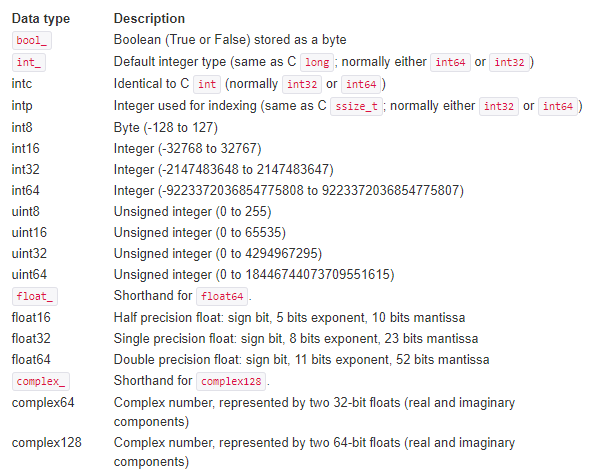

### El método astype

https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.astype.html

Es posible hacer un copia de un array aplicándole otro tipo de datos utilizando el método asociado a un array **numpy.ndarray.astype()**:

In [74]:
n = np.array([1, 2, 3])
n.dtype

dtype('int32')

In [75]:
m = n.astype("complex")
print(m.dtype)
m

complex128


array([1.+0.j, 2.+0.j, 3.+0.j])

En este ejemplo estamos creando una copia del array n, que es de tipo int32, y forzando que la copia se interprete teniendo como tipo el número complejo (por defecto, de 128 bits).

Lógicamente, si creamos una copia de tipo int de un array de tipo float, se perderá la parte decimal de los números:

In [76]:
n = np.array([1.1, 2.2, 3.3])
n.dtype

dtype('float64')

In [77]:
m = n.astype("int")
print(m.dtype)
m

int32


array([1, 2, 3])

También podemos crear un array de números a partir de un array que contenga textos representando números:

In [78]:
n = np.array(["1", "2", "3"])
n.dtype

dtype('<U1')

In [79]:
m = n.astype("int32")
print(m.dtype)
m

int32


array([1, 2, 3])

<div style="background:#ffffcc;padding:20px;color:#000000">
Ten en cuenta que este método siempre va a crear un nuevo array, aun cuando el tipo de la copia sea el mismo y, aparentemente, se esté devolviendo el mismo array.
</div>

<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

# Indexado y selección

Hay diferentes métodos para indexar y realizar selecciones en un array NumPy en función del número de dimensiones que tenga. Otra herramienta increíblemente versátil es la selección con booleanos, que revisaremos también en las siguientes secciones. Por último, NumPy ofrece lo que llama "*indexado sofisticado*".

### Selecciones en arrays unidimensionales

Si se trata de un array unidimensional, la selección se realiza de modo semejante a las listas, con índices que comienzan en cero:

In [80]:
m = np.array(["a", "b", "c", "d", "e"])

In [81]:
m[0]

'a'

In [82]:
m[2]

'c'

Si el índice es negativo, estamos contando desde el final (y el último valor tiene índice -1)

In [83]:
m[-1]

'e'

##### Uso de rangos

Podemos usar un rango de tipo *a:b* para indicar a partir de qué índice (incluido) y hasta qué índice (sin incluir) se desea realizar la selección:

In [84]:
m = np.array(["a", "b", "c", "d", "e"])

In [85]:
m[1:3]

array(['b', 'c'], dtype='<U1')

Si no se incluye el primer valor se considera desde el comienzo del array hasta el valor *b* (sin incluir), y si no se incluye el segundo valor, se considera desde el valor *a* (incluido) hasta el final del array:

In [86]:
m[:3]

array(['a', 'b', 'c'], dtype='<U1')

In [87]:
m[3:]

array(['d', 'e'], dtype='<U1')

Si no indicamos ninguno de los dos valores, estamos seleccionando todo el array:

In [88]:
m[:]

array(['a', 'b', 'c', 'd', 'e'], dtype='<U1')

También podemos utilizar valores negativos:

In [89]:
m[-4:3]

array(['b', 'c'], dtype='<U1')

In [90]:
m[2:-2]

array(['c'], dtype='<U1')

In [91]:
m[-4:-1]

array(['b', 'c', 'd'], dtype='<U1')

Si el rango indicado es inválido (por ser el índice *a* mayor que *b*, por ejemplo), el array resultante no contendrá ningún elemento:

In [92]:
m[4:2]

array([], dtype='<U1')

In [93]:
m[-2:2]

array([], dtype='<U1')

Los rangos pueden tener un tercer argumento, indicando el incremento:

In [94]:
m = np.arange(20)
m

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [95]:
m[1:12:2]

array([ 1,  3,  5,  7,  9, 11])

El incremento también puede ser negativo, siempre que el primer valor apunte a un valor posterior al segundo (en otro caso se devolvería un array vacío):

In [96]:
m[12:1:-2]

array([12, 10,  8,  6,  4,  2])

### Edición de arrays unidimensionales

El mismo tipo de selección puede utilizarse para modificar el contenido del array: Basta con seleccionar el valor en el que estemos interesados y asignarle un valor nuevo:

In [97]:
m = np.array(["a", "b", "c", "d", "e"])
m[2] = "0"
m

array(['a', 'b', '0', 'd', 'e'], dtype='<U1')

(Obsérvese que hemos cambiado el valor del índice 2 por un carácter, no por un número)

También podemos seleccionar un rango:

In [98]:
m = np.array(["a", "b", "c", "d", "e"])
m[2:4] = ["f", "g"]
m

array(['a', 'b', 'f', 'g', 'e'], dtype='<U1')

Si se asigna un escalar a un rango del array, la asignación se propaga a toda la selección:

In [99]:
m = np.array([1, 2, 3, 4, 5])
m[1:4] = 0
m

array([1, 0, 0, 0, 5])

Si las dimensiones de la selección y de la lista a asignar no son las mismas, la asignación devuelve un error:

In [100]:
m = np.array([1, 2, 3, 4, 5])
try:
    m[2:5] = [8, 9]
    print(m)
except:
    print("Error")

Error


##### Edición de selecciones

Es importante descatar que las selecciones de un array que implican rangos o métodos más complejos son, por defecto, "vistas" del array original, no copias del mismo. Esto quiere decir que si modificamos la selección, también estamos modificando el array.

Por ejemplo, supongamos que tenemos en la variable "a" el siguiente array:

In [101]:
a = np.array([1, 2, 3, 4, 5])

Realizamos ahora una selección usando un rango y la almacenamos en la variable "b":

In [102]:
b = a[2:4]
b

array([3, 4])

Si ahora modificamos "b"...

In [103]:
b[:] = 0
b

array([0, 0])

¡También estamos modificando "a"!:

In [104]:
a

array([1, 2, 0, 0, 5])

Si se desea realizar una copia independiente de un array o de una selección de un array, se puede usar el método **numpy.ndarray.copy()**:

https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.copy.html

In [105]:
a = np.array([1, 2, 3, 4, 5])
b = a[2:4].copy()

"b" es ahora una copia independiente de "a", y su modificación:

In [106]:
b[:] = 0
b

array([0, 0])

no afecta a "a":

In [107]:
a

array([1, 2, 3, 4, 5])

### Selecciones en arrays multidimensionales

Si se trata, por ejemplo, de arrays bidimensionales, los elementos correspondientes a cada índice ya no son escalares, sino arrays unidimensionales.

Partamos, por ejemplo, de este array (generado con la función **np.arange()** y redimensionado con la función **numpy.reshape()** que veremos más adelante):

In [108]:
a = np.arange(25).reshape(5, 5)
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

Recordando que el primer eje (el eje 0) es el vertical, podemos extraer una fila (que será un array unidimensional) con la siguiente sintaxis:

In [109]:
a[0]

array([0, 1, 2, 3, 4])

In [110]:
a[1]

array([5, 6, 7, 8, 9])

Al tratarse estos resultados de arrays, podemos volver a realizar selecciones en ellos:

In [111]:
a[1][2]

7

En todo caso, NumPy nos permite usar un único par de corchetes, separando estos índices por comas, haciendo la selección mucho más simple:

In [112]:
a[1, 2]

7

Es decir, estamos indicando el índice de la fila en primer lugar y el de la columna a continuación.

Estos índices pueden ser, además, rangos del tipo *a:b*. En el siguiente ejemplo estamos extrayendo los elementos que pertenecen a las filas 1 y 2 y columna 3 (recordemos que los índices comienzan en cero):

In [113]:
a[1:3, 3]

array([ 8, 13])

En este otro ejemplo estamos seleccionando los elementos que pertenecen a las filas 1 y 2, y columnas 2 y 3:

In [114]:
a[1:3, 2:4]

array([[ 7,  8],
       [12, 13]])

Como ya sabemos, si en un rango se omite el primer valor, se toma el valor cero por defecto. Y si se omite el segundo valor, se consideran todos los elementos hasta el final. Así, en el siguiente ejemplo se extraen los elementos de las filas 0, 1 y 2, y columnas 3 y 4:

In [115]:
a[:3, 3:]

array([[ 3,  4],
       [ 8,  9],
       [13, 14]])

Y, por supuesto, si en un rango se omiten los dos valores, se consideran todos los elementos disponibles:

In [116]:
a[:, 3]

array([ 3,  8, 13, 18, 23])

Obsérvese que, en el ejemplo anterior, estamos seleccionando "todas las filas" (haciendo referencia a ellas con los dos puntos) y la columna 3 (es decir, estamos seleccionando una columna).

### Selecciones con booleanos

Una herramienta muy útil es la selección con booleanos. Partamos del siguiente array de una dimensión y 7 elementos:

In [117]:
a = np.array([1, 2, 3, 4, 5, 6, 7])
a

array([1, 2, 3, 4, 5, 6, 7])

Es posible realizar una selección utilizando una lista (o una tupla, o incluso un array NumPy) de booleanos:

In [118]:
mask = [True, True, False, True, False, False, True]
a[mask]

array([1, 2, 4, 7])

El resultado que hemos obtenido al seleccionar el array "a" con la máscara "mask" es otro array NumPy formado por aquellos valores del array original para los que el booleano de la máscara toma el valor *True* (los elementos 1, 2, 4 y 7, en nuestro ejemplo).

Obsérvese que la lista de booleanos usada para realizar la selección en el array es de la misma longitud que el array pues, de otro modo, la selección devolvería un error:

In [119]:
wrong_mask = [True, True, False, True]
try:
    a[wrong_mask]
except:
    print("Error")

Error


Esta técnica de selección nos permite utilizar operadores lógicos y obtener potentes resultados de una forma muy sencilla. Así, por ejemplo, si seguimos partiendo del array *a* ya mencionado:

In [120]:
a = np.array([1, 2, 3, 4, 5, 6, 7])

podemos utilizar la siguiente máscara:

In [121]:
mask = a > 3
mask

array([False, False, False,  True,  True,  True,  True])

Si ahora aplicamos la máscara al array, estamos quedándonos con los datos de *a* que son mayores que 3:

In [122]:
a[mask]

array([4, 5, 6, 7])

Y nada nos impide saltarnos el paso en el que definimos la variable "mask" explícitamente y generar el array de booleanos directamente en la definición de la selección:

In [123]:
a[a > 3]

array([4, 5, 6, 7])

### Edición de arrays con selección con booleanos

Esta misma técnica puede ser utilizada para modificar el array:

In [124]:
a = np.array([1, 2, 3, 4, 5, 6, 7])
a[a > 3] = 0
a

array([1, 2, 3, 0, 0, 0, 0])

La máscara puede ser, por supuesto, una expresión más compleja, combinando, por ejemplo, más de una condición con los operadores & (and) y | (or):

In [125]:
a = np.array([1, 2, 3, 4, 5, 6, 7])
a[(a >= 6) | (a == 2)] = 0
a

array([1, 0, 3, 4, 5, 0, 0])

<div style="background:#ffffcc;padding:20px;color:#000000">
Ten en cuenta que las palabras clave de Python <b>and</b> y <b>or</b> no funcionan con arrays booleanos. En su lugar deberemos usar los operadores <b>|</b> y <b>&</b>, respectivamente.
</div>

### Indexado sofisticado

*Indexado sofisticado* (*fancy indexing*) es el nombre que da NumPy al uso de listas de números enteros para extraer filas del array en un cierto orden. Si partimos del siguiente array:

In [126]:
a = np.arange(1, 26).reshape(5, 5)
a

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25]])

Podemos seleccionar una fila -ya lo hemos visto- indicando su índice como única referencia en la selección:

In [127]:
a[3]

array([16, 17, 18, 19, 20])

Pero ¿cómo podríamos seleccionar más de una fila no consecutiva simultáneamente? El indexado sofisticado nos permite este tipo de selecciones siendo posible, además, especificar el orden de las filas extraídas. Para ello deberemos usar como índice no un valor simple, sino una lista de valores simples, en la que cada valor representa una fila.

De esta forma, podemos extraer las filas 3 y 1 -en este orden- usando como índice la lista [3, 1]:

In [128]:
a[[3, 1]]

array([[16, 17, 18, 19, 20],
       [ 6,  7,  8,  9, 10]])

O las columnas que nos interesan en el orden en el que nos interesa:

In [129]:
a[:, [3, 1]]

array([[ 4,  2],
       [ 9,  7],
       [14, 12],
       [19, 17],
       [24, 22]])

Si, en lugar de usar como índice una lista, pasamos varias listas separadas por comas, se utiliza cada una de ellas para realizar una selección sobre el resultado de la anterior. Por ejemplo, si usamos como índice [3, 1], [2, 0]:

In [130]:
a[[3, 1], [2, 0]]

array([18,  6])

Vemos como con la primera lista ([3, 1]) se extraen las filas 3 y 1. De estas dos filas, con la segunda lista ([2, 0]) se están extrayendo el elemento de índice 2 de la primera fila (el 18) y el elemento de índice 0 de la segunda (el 6).

<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

# Redimensionamiento de arrays

Hay varias formas de modificar el número de dimensiones y el tamaño de un array NumPy: Podemos utilizar la función y el método **reshape**, y recurrir a funciones de modificación de arrays como la función **transpose**, que devuelve la transposición de un array.

### numpy.reshape()

https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html

La función **numpy.reshape()** devuelve un nuevo array con los datos del array pasado como primer argumento y el nuevo tamaño indicado por el parámetro **newshape**:

In [131]:
a = np.arange(12)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [132]:
b = np.reshape(a, newshape = (4, 3))
print(b.shape)
b

(4, 3)


array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

También con esta función es posible utilizar el valor -1 para dejar que sea NumPy quien calcule el tamaño adecuado para la dimensión correspondiente:

In [133]:
a = np.arange(12)

In [134]:
b = np.reshape(a, (4, -1))
print(b.shape)
b

(4, 3)


array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

En el ejemplo anterior no se ha indicado la dimensión del segundo eje, y ha sido NumPy quien ha inferido el valor.

### .reshape()

https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.reshape.html

La funcionalidad de redimensionamiento de un array NumPy también está disponible en método **numpy.ndarray.reshape()**, método que devuelve una copia del array con el nuevo tamaño:

In [135]:
a = np.arange(12)

In [136]:
b = a.reshape((4, -1))
print(b.shape)
b

(4, 3)


array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

### numpy.resize()

Tanto la función *np.reshape()* como el método *a.reshape()* devuelve un nuevo array con las dimensiones indicadas sin modificar el array original. La función **np.resize()**, sin embargo, se aplica *in-place*:

In [137]:
a = np.arange(12)
a.resize(3, 4)

In [138]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

### .flatten()

https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.flatten.html

El método **numpy.ndarray.flatten()** devuelve una copia del array "colapsado" a una única dimensión. Veamos un ejemplo sencillo:

In [139]:
a = np.array([[1, 2, 3], [4, 5, 6]])
a

array([[1, 2, 3],
       [4, 5, 6]])

Si ejecutamos el método en cuestión, obtenemos el siguiente resultado:

In [140]:
a.flatten()

array([1, 2, 3, 4, 5, 6])

### Transposición de arrays

https://docs.scipy.org/doc/numpy/reference/generated/numpy.transpose.html

La transposición de arrays es una forma especial de redimensionamiento. Con este objetivo, NumPy ofrece la función **numpy.transpose()**:

In [141]:
a = np.array([[1, 2, 3],
            [4, 5, 6]])
print(a.shape)
a

(2, 3)


array([[1, 2, 3],
       [4, 5, 6]])

In [142]:
b = np.transpose(a)
print(b.shape)
b

(3, 2)


array([[1, 4],
       [2, 5],
       [3, 6]])

La misma funcionalidad se ofrece en el método **numpy.ndarray.transpose()**:

https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.transpose.html

In [143]:
a

array([[1, 2, 3],
       [4, 5, 6]])

In [144]:
c = a.transpose()
print(c.shape)
c

(3, 2)


array([[1, 4],
       [2, 5],
       [3, 6]])

Los arrays NumPy también posee el atributo **numpy.ndarray.T**, que devuelve el mismo resultado:

https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.T.html

In [145]:
a

array([[1, 2, 3],
       [4, 5, 6]])

In [146]:
a.T

array([[1, 4],
       [2, 5],
       [3, 6]])

### numpy.expand_dims()

Si tenemos un array unidimensional como

In [147]:
a = np.array([2, 4, 6])

podríamos generar una copia del mismo tras añadir una dimensión, para lo que podríamos usar la función *np.reshape()* o el método *.reshape()* que hemos visto. Podríamos añadir una dimensión antes de la que existe:

In [148]:
a.reshape(1, -1)

array([[2, 4, 6]])

In [149]:
a.reshape(-1, 1)

array([[2],
       [4],
       [6]])

Esto mismo podemos conseguir con la función **np.expand_dims()**, función a la que hay que pasar como argumentos el array y la posición del nuevo eje. Por ejemplo, para añadir una dimensión al array *a* antes de la que existe:

In [150]:
np.expand_dims(a, 0)

array([[2, 4, 6]])

O, para añadirla después:

In [151]:
np.expand_dims(a, 1)

array([[2],
       [4],
       [6]])

### numpy.squeeze()

También es posible eliminar ejes de un array. Por ejemplo:

In [152]:
a = np.array([[2, 4, 6]])
a

array([[2, 4, 6]])

Si quisiéramos eliminar una de las dos dimensiones, bastaría con:

In [153]:
a.reshape(-1)

array([2, 4, 6])

También podemos utilizar la función **np.squezze()**, a la que hay que pasar como argumentos el array y la posición del eje a eliminar:

In [154]:
np.squeeze(a, 0)

array([2, 4, 6])

<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>